<a href="https://colab.research.google.com/github/RishabhMehra/Machine-Learning-with-Python-/blob/Data/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pt
from google.colab import files
import statsmodels.api as sm
import io

In [ ]:
uploaded = files.upload()

Saving auction.csv to auction (1).csv


In [ ]:

ipl_auction = pd.read_csv(io.BytesIO(uploaded['auction.csv']))

In [ ]:
ipl_auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         128 non-null    int64 
 1   Name               128 non-null    object
 2   Role               128 non-null    object
 3   Country            128 non-null    object
 4   Status             128 non-null    object
 5   Base_Price(Lakh)   128 non-null    int64 
 6   Final_Price(Lakh)  128 non-null    object
 7   Team               128 non-null    object
 8   Mat                128 non-null    object
 9   Inns               128 non-null    object
 10  NO                 128 non-null    object
 11  Runs               128 non-null    object
 12  HS                 128 non-null    object
 13  Ave                128 non-null    object
 14  BF                 128 non-null    object
 15  SR                 128 non-null    object
 16  100                128 non-null    object
 1

In [ ]:
ipl_auction.iloc[0:5, 0:10]

,Unnamed: 0,Name,Role,Country,Status,Base_Price(Lakh),Final_Price(Lakh),Team,Mat,Inns
0,0,Arjun Tendulkar,Bowling Allrounder,India,SOLD,20,20,MI,2,2
1,1,Akash Singh,Bowler,India,SOLD,20,20,RR,-,-
2,2,Pawan Negi,Bowling Allrounder,India,SOLD,50,50,KKR,119,83
3,3,Venkatesh Iyer,Bowler,India,SOLD,20,20,KKR,38,32
4,4,Hanuma Vihari,Batting Allrounder,India,UNSOLD,100,-,-,74,73


In [ ]:
for col in ipl_auction:
  for x in range(ipl_auction.shape[0]) :
    if ipl_auction[col][x] == '-' :
      ipl_auction[col][x]=None
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
ipl_auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         128 non-null    int64 
 1   Name               128 non-null    object
 2   Role               128 non-null    object
 3   Country            128 non-null    object
 4   Status             128 non-null    object
 5   Base_Price(Lakh)   128 non-null    int64 
 6   Final_Price(Lakh)  57 non-null     object
 7   Team               57 non-null     object
 8   Mat                115 non-null    object
 9   Inns               114 non-null    object
 10  NO                 114 non-null    object
 11  Runs               96 non-null     object
 12  HS                 114 non-null    object
 13  Ave                89 non-null     object
 14  BF                 114 non-null    object
 15  SR                 89 non-null     object
 16  100                114 non-null    object
 1

In [ ]:
ipl_auction=ipl_auction[ipl_auction['Final_Price(Lakh)'].notna()]
ipl_auction=ipl_auction.fillna(0)

In [ ]:
ipl_auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 125
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         57 non-null     int64 
 1   Name               57 non-null     object
 2   Role               57 non-null     object
 3   Country            57 non-null     object
 4   Status             57 non-null     object
 5   Base_Price(Lakh)   57 non-null     int64 
 6   Final_Price(Lakh)  57 non-null     object
 7   Team               57 non-null     object
 8   Mat                57 non-null     object
 9   Inns               57 non-null     object
 10  NO                 57 non-null     object
 11  Runs               57 non-null     object
 12  HS                 57 non-null     object
 13  Ave                57 non-null     object
 14  BF                 57 non-null     object
 15  SR                 57 non-null     object
 16  100                57 non-null     object
 17

In [ ]:
import re
def cleanstr(df):
  for i in range(df.shape[0]):
    for j in range(df.shape[1]):
      if type(df.iat[i,j])==str:
        df.iat[i,j]=df.iat[i,j].strip('*')

cleanstr(ipl_auction)

In [ ]:
ipl_auction

,Unnamed: 0,Name,Role,Country,Status,Base_Price(Lakh),Final_Price(Lakh),Team,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,4s,6s,Ct,St,Balls,Wkts,BBI,BBM,Econ,4w,5w
0,0,Arjun Tendulkar,Bowling Allrounder,India,SOLD,20,20,MI,2,2,1,67,3,33.50,7,21.0,0,0,0,0,0,0,42,2,1/33,1/33,9.57,0,0
1,1,Akash Singh,Bowler,India,SOLD,20,20,RR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Pawan Negi,Bowling Allrounder,India,SOLD,50,50,KKR,119,83,32,2363,41,24.61,657,19.8,0,0,56,33,40,0,1905,96,5/22,5/22,7.44,1,1
3,3,Venkatesh Iyer,Bowler,India,SOLD,20,20,KKR,38,32,12,541,88,25.76,526,22.1,0,2,63,28,17,0,465,21,2/10,2/10,6.98,0,0
7,7,Ben Cutting,Bowling Allrounder,Australia,SOLD,75,75,KKR,171,143,39,4073,81,31.82,1589,21.2,0,4,148,153,71,0,2717,128,5/28,5/28,8.99,0,1
11,11,Hari Nishanth,Batsman,India,SOLD,20,20,CSK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,12,Harbhajan Singh,Bowler,India,SOLD,200,200,KKR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,13,Mujeeb Ur Rahman,Bowler,Afghanistan,SOLD,100,100,SRH,136,38,21,3453,27,23.48,158,21.0,0,0,13,5,30,0,3090,147,5/15,5/15,6.70,3,1
14,14,Sam Billings,WK-Batsman,England,SOLD,200,200,DC,187,175,26,0,95,0,2692,0,0,21,297,105,107,17,0,0,0,0,0,0,0
15,15,Kedar Jadhav,Batting Allrounder,India,SOLD,200,200,SRH,143,126,31,88,84,22.00,1785,15.0,0,12,207,78,50,7,60,4,2/23,2/23,8.80,0,0


In [ ]:
ipl_auction.loc[ipl_auction['Name']=='Sam Billings']

,Unnamed: 0,Name,Role,Country,Status,Base_Price(Lakh),Final_Price(Lakh),Team,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,4s,6s,Ct,St,Balls,Wkts,BBI,BBM,Econ,4w,5w
14,14,Sam Billings,WK-Batsman,England,SOLD,200,200,DC,187,175,26,0,95,0,2692,0,0,21,297,105,107,17,0,0,0,0,0,0,0


In [ ]:
ipl_auction1= ipl_auction.drop(['Unnamed: 0','BBI','BBM','Base_Price(Lakh)','Team','Final_Price(Lakh)','Name', 'Status'],axis=1)

In [ ]:
X_features=ipl_auction1.columns

print(X_features)

Index(['Role', 'Country', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '4s', '6s', 'Ct', 'St', 'Balls', 'Wkts', 'Econ', '4w',
       '5w'],
      dtype='object')


#Encoding Categorical Features


In [ ]:
ipl_auction['Role'].unique()

array(['Bowling Allrounder ', 'Bowler ', 'Batsman ', 'WK-Batsman ',
       'Batting Allrounder '], dtype=object)

In [ ]:
pd.get_dummies(ipl_auction['Role'])[0:6]

,Batsman,Batting Allrounder,Bowler,Bowling Allrounder,WK-Batsman
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,1,0,0
7,0,0,0,1,0
11,1,0,0,0,0


In [ ]:
Categorical_features = ['Role','Country']


In [ ]:
ipl_auction_encoded = pd.get_dummies(ipl_auction[X_features],columns=Categorical_features,drop_first=True)

In [ ]:
for cols in ipl_auction_encoded.columns:
  ipl_auction_encoded[cols]=pd.to_numeric(ipl_auction_encoded[cols],errors='coerce')

In [ ]:
ipl_auction_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 125
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mat                       57 non-null     int64  
 1   Inns                      57 non-null     int64  
 2   NO                        57 non-null     int64  
 3   Runs                      57 non-null     int64  
 4   HS                        57 non-null     int64  
 5   Ave                       57 non-null     float64
 6   BF                        57 non-null     int64  
 7   SR                        57 non-null     float64
 8   100                       57 non-null     int64  
 9   50                        57 non-null     int64  
 10  4s                        57 non-null     int64  
 11  6s                        57 non-null     int64  
 12  Ct                        57 non-null     int64  
 13  St                        57 non-null     int64  
 14  Balls      

In [ ]:
X_features =ipl_auction_encoded.columns

In [ ]:
from sklearn.model_selection import  train_test_split

X = sm.add_constant(ipl_auction_encoded)
Y = ipl_auction['Final_Price(Lakh)']

train_X,test_X,train_y,test_y =train_test_split(X,Y,train_size=0.8,random_state=42)

In [ ]:
ipl_model_1 = sm.OLS(train_y.astype(float),train_X.astype(float)).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                    OLS                   Adj. R-squared:         0.442   
Dependent Variable:       Final_Price(Lakh)     AIC:                    648.7010
Date:                     2021-04-17 23:22      BIC:                    704.7076
No. Observations:         45                    Log-Likelihood:         -293.35 
Df Model:                 30                    F-statistic:            2.163   
Df Residuals:             14                    Prob (F-statistic):     0.0641  
R-squared:                0.823                 Scale:                  86468.  
--------------------------------------------------------------------------------
                           Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
--------------------------------------------------------------------------------
const                      48.9405  997.3978  0.0491 0.9616 -2090.2651 2188.1460
Mat                        -6.6633   12.7535 -0.5225 0.6095   -34.0168   20.6903
Inns                       16.2944   16.1851  1.0067 0.3311   -18.4193   51.0080
NO                        -13.9043   19.5641 -0.7107 0.4889   -55.8652   28.0566
Runs                       -0.0651    1.0613 -0.0613 0.9520    -2.3415    2.2113
HS                          5.3931    4.3958  1.2269 0.2401    -4.0348   14.8211
Ave                        11.8825   34.0815  0.3486 0.7325   -61.2152   84.9801
BF                         -0.6896    0.8760 -0.7872 0.4443    -2.5684    1.1893
SR                        -14.3934   45.3145 -0.3176 0.7555  -111.5834   82.7966
100                       171.7541  235.6873  0.7287 0.4782  -333.7450  677.2531
50                         99.1727   65.5084  1.5139 0.1523   -41.3289  239.6742
4s                         -2.3368    5.3588 -0.4361 0.6694   -13.8302    9.1566
6s                         -6.8056    6.7444 -1.0091 0.3301   -21.2710    7.6597
Ct                         -3.6760   15.7772 -0.2330 0.8191   -37.5147   30.1627
St                         30.9205   51.3724  0.6019 0.5569   -79.2623  141.1034
Balls                       0.2519    1.6299  0.1546 0.8794    -3.2439    3.7477
Wkts                       -1.5686   16.1723 -0.0970 0.9241   -36.2547   33.1175
Econ                        8.7208   25.4635  0.3425 0.7371   -45.8930   63.3345
4w                         69.3854   90.4369  0.7672 0.4557  -124.5825  263.3534
5w                        -60.9457  172.6548 -0.3530 0.7294  -431.2535  309.3621
Role_Batting Allrounder   193.7349  303.1225  0.6391 0.5331  -456.3982  843.8681
Role_Bowler               262.6694  424.6604  0.6185 0.5462  -648.1365 1173.4753
Role_Bowling Allrounder   648.5225  397.7002  1.6307 0.1252  -204.4596 1501.5047
Role_WK-Batsman          -153.9033  416.6008 -0.3694 0.7173 -1047.4231  739.6165
Country_ Australia        428.7351  830.7464  0.5161 0.6138 -1353.0388 2210.5090
Country_ Bangladesh       -76.2415  764.0325 -0.0998 0.9219 -1714.9282 1562.4452
Country_ England         -312.9995  903.4973 -0.3464 0.7342 -2250.8084 1624.8095
Country_ India           -337.8457  820.8510 -0.4116 0.6869 -2098.3961 1422.7047
Country_ New Zealand      601.8055  808.2241  0.7446 0.4688 -1131.6627 2335.2738
Country_ South Africa    1175.4022 1107.9394  1.0609 0.3067 -1200.8914 3551.6958
Country_ West Indies     -400.5184  959.1994 -0.4176 0.6826 -2457.7964 1656.7597
--------------------------------------------------------------------------------
Omnibus:                    6.377            Durbin-Watson:               2.243 
Prob(Omnibus):              0.041            Jarque-Bera (JB):            9.201 
Skew:                       0.183            Prob(JB):                    0.010 
Kurtosis:                   5.185            Condition No.:               161475
================================================================================
* The c

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vit_factors(X):
  vif_factors = pd.DataFrame()
  vif_factors['column'] =X.columns
  vif_factors['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif_factors

In [ ]:
vif_factors = get_vit_factors(X)
vif_factors

,column,VIF
0,const,187.605503
1,Mat,193.798508
2,Inns,580.177360
3,NO,34.866695
4,Runs,569.207553
5,HS,7.477310
6,Ave,131.855698
7,BF,346.786202
8,SR,130.837818
9,100,14.938350


In [ ]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

Text(0.5, 1.0, 'Figure 4.5 - Heatmap depictong correlation between features')

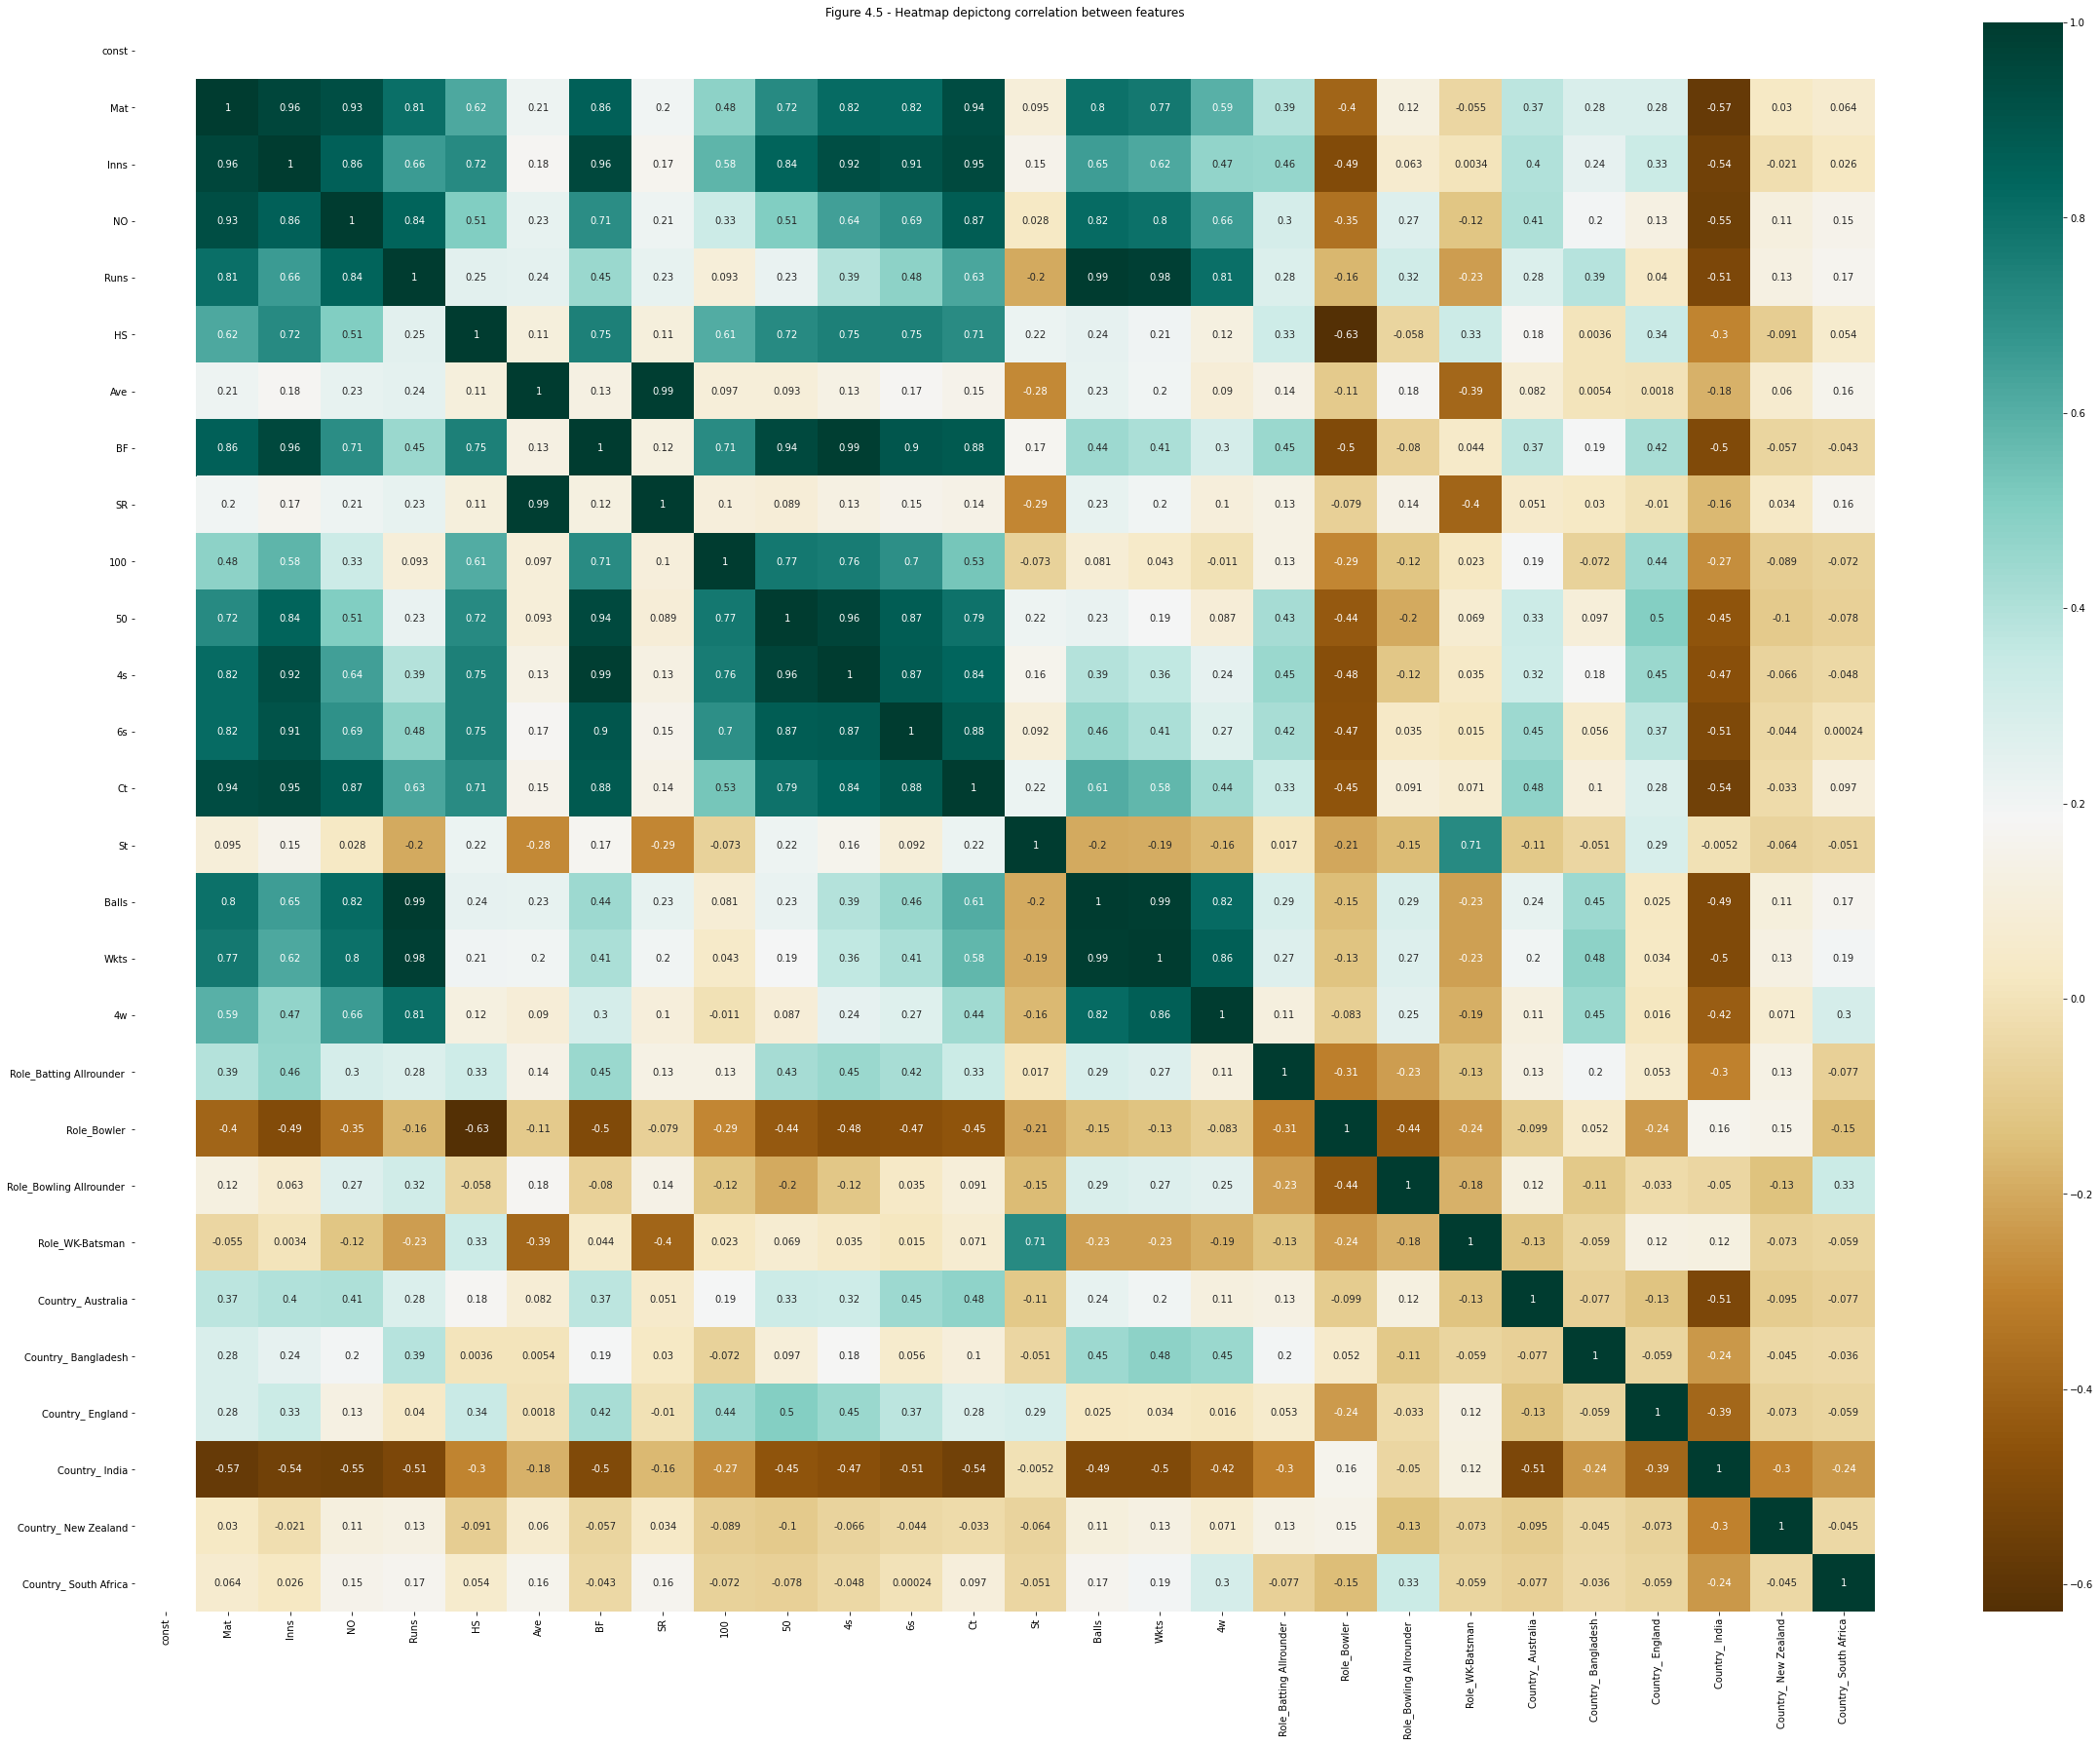

In [ ]:
pt.figure (figsize =(40,30))
sn.heatmap(X[columns_with_large_vif].corr(),annot=True,cmap='BrBG')
pt.title("Figure 4.5 - Heatmap depictong correlation between features")

In [ ]:
columns_to_be_reomoved = ['Inns','NO','HS','Ct','Ave','BF','Runs','Balls','50','4s','Wkts','Mat','6s','Country_ India','Econ']

In [ ]:
X_new_features = list(set(X_features)-set(columns_to_be_reomoved))

In [ ]:
get_vit_factors(X[X_new_features])

,column,VIF
0,Country_ New Zealand,1.204134
1,100,1.921911
2,St,2.810382
3,Country_ West Indies,1.228551
4,Country_ England,1.829897
5,Role_Bowling Allrounder,2.013751
6,Role_WK-Batsman,2.444810
7,Country_ Bangladesh,1.744611
8,Country_ South Africa,1.445919
9,5w,2.344173


In [ ]:
train_X  = train_X[X_new_features]
train_X.info()

KeyError: ignored

In [ ]:



ipl_model_2 = sm.OLS(train_y.astype(float),train_X.astype(float)).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS               Adj. R-squared (uncentered): 0.574   
Dependent Variable:     Final_Price(Lakh) AIC:                         654.1689
Date:                   2021-04-17 23:22  BIC:                         688.4954
No. Observations:       45                Log-Likelihood:              -308.08 
Df Model:               19                F-statistic:                 4.190   
Df Residuals:           26                Prob (F-statistic):          0.000438
R-squared (uncentered): 0.754             Scale:                       89620.  
-------------------------------------------------------------------------------
                            Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-------------------------------------------------------------------------------
Country_ India              56.0403 147.8938  0.3789 0.7078 -247.9599  360.0404
Role_WK-Batsman            -44.5921 251.8675 -0.1770 0.8608 -562.3131  473.1290
Econ                         5.7916  17.8237  0.3249 0.7478  -30.8455   42.4288
4w                          46.8227  49.5042  0.9458 0.3529  -54.9346  148.5800
100                        109.4944  94.1195  1.1634 0.2553  -83.9710  302.9599
Role_Bowler                -24.0965 163.0336 -0.1478 0.8836 -359.2168  311.0237
Country_ New Zealand       648.0348 241.3848  2.6847 0.0125  151.8613 1144.2083
Country_ England           568.5315 315.6409  1.8012 0.0833  -80.2776 1217.3407
Role_Bowling Allrounder    379.4478 181.8704  2.0864 0.0469    5.6080  753.2877
Country_ Bangladesh        248.7602 338.3629  0.7352 0.4688 -446.7546  944.2750
Country_ South Africa     1372.7976 528.4153  2.5980 0.0152  286.6244 2458.9707
Mat                         -1.3487   1.8278 -0.7379 0.4672   -5.1059    2.4084
Role_Batting Allrounder    205.1382 198.8874  1.0314 0.3118 -203.6806  613.9571
St                          19.9426  29.7943  0.6693 0.5092  -41.3004   81.1856
6s                          -3.1649   2.2158 -1.4283 0.1651   -7.7196    1.3898
Country_ West Indies       -45.4192 375.2865 -0.1210 0.9046 -816.8316  725.9931
5w                          22.0968 124.3570  0.1777 0.8603 -233.5226  277.7163
Country_ Australia         631.5769 238.1244  2.6523 0.0134  142.1051 1121.0487
SR                           0.8263   4.6670  0.1771 0.8608   -8.7669   10.4195
-------------------------------------------------------------------------------
Omnibus:                  12.396            Durbin-Watson:               2.201 
Prob(Omnibus):            0.002             Jarque-Bera (JB):            18.582
Skew:                     0.773             Prob(JB):                    0.000 
Kurtosis:                 5.743             Condition No.:               1908  
===============================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [ ]:


Significant_vars = ['Country_ New Zealand','Role_Bowling Allrounder','Country_ South Africa','Country_ Australia']

columns_to_be_removed =list(set(X_new_features)-set(Significant_vars))

Significant_vars = list( set(X_new_features)-set(columns_to_be_removed))
train_X =train_X[Significant_vars]

In [ ]:

ipl_model_3  = sm.OLS(train_y.astype(float),train_X.astype(float)).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS               Adj. R-squared (uncentered): 0.514     
Dependent Variable:     Final_Price(Lakh) AIC:                         649.6265  
Date:                   2021-04-17 23:31  BIC:                         655.0465  
No. Observations:       45                Log-Likelihood:              -321.81   
Df Model:               3                 F-statistic:                 16.89     
Df Residuals:           42                Prob (F-statistic):          2.39e-07  
R-squared (uncentered): 0.547             Scale:                       1.0212e+05
----------------------------------------------------------------------------------
                            Coef.    Std.Err.    t     P>|t|    [0.025     0.975] 
----------------------------------------------------------------------------------
Country_ South Africa     1600.0000  319.5658  5.0068  0.0000  955.0900  2244.9100
Country_ New Zealand       616.6667  184.5014  3.3423  0.0018  244.3277   989.0056
Country_ Australia         495.8333  130.4622  3.8006  0.0005  232.5499   759.1167
---------------------------------------------------------------------------------
Omnibus:                    14.720            Durbin-Watson:               2.207 
Prob(Omnibus):              0.001             Jarque-Bera (JB):            18.050
Skew:                       1.102             Prob(JB):                    0.000 
Kurtosis:                   5.184             Condition No.:               2     
=================================================================================

"""

# Residual Anlysis in Multiple Linear Regression

In [ ]:
 def draw_pp_plot(model, title) :
   probplot = sm.ProbPlot(model.resid)
   pt.figure(figsize =(8,6))
   probplot.ppplot(line='45')
   pt.title(title)
   pt.show()

<Figure size 576x432 with 0 Axes>

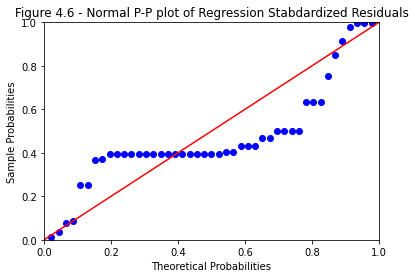

In [ ]:
draw_pp_plot(ipl_model_3,'Figure 4.6 - Normal P-P plot of Regression Stabdardized Residuals')

In [ ]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()


def plot_resid_fitted(fitted, resid, title):
  pt.scatter( get_standardized_values(fitted),get_standardized_values(resid))
  pt.title(title)
  pt.xlabel("Standardized predicted values")
  pt.ylabel("Standardized residual values")
  pt.show()

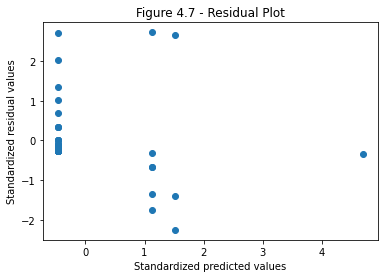

In [ ]:
plot_resid_fitted(ipl_model_3.fittedvalues,ipl_model_3.resid,"Figure 4.7 - Residual Plot")

#Detecting Influncers

Leverage ratios of more than 3(k+1)/n are treated as highly influential observations

In [ ]:
k  = train_X.shape[1]
n  = train_X.shape[0]  

In [ ]:
print("Number of variables: ",k ,"and number of observations: ",n)

Number of variables:  3 and number of observations:  45


In [ ]:
leverage_cutoff = 3*((k+1)/n)
print("Cutoff for leverage value :", round(leverage_cutoff,3))

Cutoff for leverage value : 0.267


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:708: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)


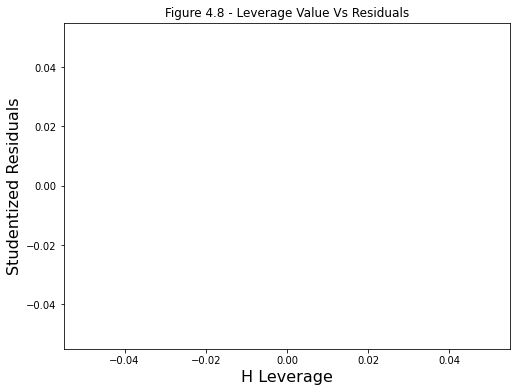

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax =pt.subplots(figsize =(8,6))
influence_plot(ipl_model_3,ax=ax)
pt.title("Figure 4.8 - Leverage Value Vs Residuals")
pt.show()

#Tranforming Response Variable

process of deriving a new dependent and/or independent variables to identify the correct functional form of the regression model.

example the dependent variable Y may be replaced in the model with ln(Y),1/Y,etc. similarly an independent variable X may be replacedwith ln(X),1/X,etc.


Transformation is used to address the following issues:


1.   Poor fit(low R-squared value)
2.   Pattern in residual analysis indicating a potential non-linear relationship between the dependent and independent variables.
3.   Residuals do not follow a normal distribution.
4.   Residuals are not homoscedastic





In [ ]:
train_y = np.sqrt(train_y.astype(float))

ipl_model_4 = sm.OLS(train_y.astype(float),train_X.astype(float)).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS               Adj. R-squared (uncentered): 0.462   
Dependent Variable:     Final_Price(Lakh) AIC:                         349.7426
Date:                   2021-04-18 01:03  BIC:                         355.1626
No. Observations:       45                Log-Likelihood:              -171.87 
Df Model:               3                 F-statistic:                 13.90   
Df Residuals:           42                Prob (F-statistic):          1.96e-06
R-squared (uncentered): 0.498             Scale:                       130.30  
---------------------------------------------------------------------------------
                          Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------------------
Country_ South Africa    40.0000    11.4149   3.5042   0.0011   16.9638   63.0362
Country_ New Zealand     21.0405     6.5904   3.1926   0.0027    7.7405   34.3404
Country_ Australia       20.4299     4.6601   4.3840   0.0001   11.0254   29.8344
-------------------------------------------------------------------------------
Omnibus:                    3.509            Durbin-Watson:               1.532
Prob(Omnibus):              0.173            Jarque-Bera (JB):            2.628
Skew:                       0.293            Prob(JB):                    0.269
Kurtosis:                   4.028            Condition No.:               2    
===============================================================================

"""

###Making Prediction on Validation set

In [ ]:
pred_y  = np.power(ipl_model_4.predict(test_X[train_X.columns]),2)

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

570.8716567709607

In [ ]:
np.round(metrics.r2_score(pred_y, test_y),2)

-0.62

##Autocorelation 

According to Regression model assumptions there should be no correlation between error terms. If there is an auto-correlation, the standard error estimate of the beta coefficient may be underestimated and that will result in over-estimation of t-test and low p-value.

Thus a vatiable with no statistically significant relationship with the response variable may be accepted in the model due to the presence of auto-correlation.

Durbin-watson statistic should be close to 2.